In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df1 = pd.pandas.read_csv('C:/Users/santi/Documents/TFG_Info/DataSheet/results/results_1.csv')
df2 = pd.pandas.read_csv('C:/Users/santi/Documents/TFG_Info/DataSheet/results/results_2.csv')
df3 = pd.pandas.read_csv('C:/Users/santi/Documents/TFG_Info/DataSheet/results/results_3.csv')
dfFinal = pd.pandas.read_csv('C:/Users/santi/Documents/TFG_Info/DataSheet/results/results_Final.csv')
dest = 'C:/Users/santi/Documents/TFG_Info/EleccionAlgoritmo'
os.chdir(dest)

In [11]:
def graficar_ataques_algoritmos(df,name):

    # Calcular la media para cada combinación de ataque y algoritmo
    df_media = df.groupby(['File', 'ML algorithm']).mean().reset_index()



    # Obtener la lista de columnas de valores que deseas graficar (por ejemplo, precisión, f1-score, etc.)
    columnas_valores = df.columns.difference(['File', 'ML algorithm'])
    
    # Graficar cada columna de valores
    for columna in columnas_valores:
        # Crear una gráfica de barras para mostrar la información
        fig, ax = plt.subplots(figsize=(12, 8))
        
        df_media.pivot(index='File', columns='ML algorithm', values=columna).plot(kind='bar', ax=ax, label=columna)

        # Personalizar la gráfica
        plt.title('Ataques por Algoritmo (Media de 10 intentos)')
        plt.xlabel('Ataque')
        plt.ylabel(columna + ' Promedio')
        
        # Crear la leyenda única fuera del bucle
        algoritmos_unicos = df_media['ML algorithm'].unique()
        plt.legend(algoritmos_unicos, title='Algoritmos', bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.savefig(name + columna + '.png', bbox_inches='tight')

        #plt.show()


In [ ]:
graficar_ataques_algoritmos(df1,'Resultados1_')
graficar_ataques_algoritmos(df2,'Resultados2_')
graficar_ataques_algoritmos(df3,'Resultados3_')
graficar_ataques_algoritmos(dfFinal,'ResultadosFinal_')

Vamos a analizar uno por uno las gráficas que salen para ver que algoritmos deberíamos usar.

En primer lugar veamos el valor promedio de cada característica por cada ataque. Y vamos a ver que algoritmo es el óptimo para hacer esto. 

### Accuracy

- **Bot:** AdaBoost 
- **DDos:** ID3
- **DoS GoldenEye:** Random Forest
- **DoS Hulk:** AdaBoost/ID3
- **DoS Slowhttptest:** AdaBoost
- **DoS slowloris:** AdaBoost
- **FTP-Patator:** Random Forest
- **Heartbleed:** AdaBoost/ID3/Naive Bayes/Nearest Neighbors/QDA/Random Forest
- **Infiltration:** Random Forest
- **PortScan:** Nearest Neighbors
- **SSH-Patator:** AdaBoost
- **Web Attack:** Random Forest

### F1-Score

- **Bot:** AdaBoost 
- **DDos:** ID3
- **DoS GoldenEye:** Random Forest
- **DoS Hulk:** ID3
- **DoS Slowhttptest:** AdaBoost
- **DoS slowloris:** AdaBoost
- **FTP-Patator:** AdaBoost/ID3/MLP/Nearest Neighbors/Random Forest
- **Heartbleed:** AdaBoost/ID3/Naive Bayes/Nearest Neighbors/QDA/Random Forest
- **Infiltration:** Random Forest
- **PortScan:** ID3/Nearest Neighbors/Random Forest
- **SSH-Patator:** AdaBoost/ID3/Random Forest
- **Web Attack:** Ada Boost

### Precision

- **Bot:** AdaBoost 
- **DDos:** ID3
- **DoS GoldenEye:** Random Forest
- **DoS Hulk:** AdaBoost
- **DoS Slowhttptest:** AdaBoost
- **DoS slowloris:** AdaBoost/ID3
- **FTP-Patator:** AdaBoost/ID3/MLP/Nearest Neighbors/Random Forest
- **Heartbleed:** AdaBoost/ID3/Naive Bayes/Nearest Neighbors/QDA/Random Forest
- **Infiltration:** Random Forest
- **PortScan:** ID3/Nearest Neighbors/Random Forest
- **SSH-Patator:** AdaBoost/Nearest Neighbors
- **Web Attack:** Random Forest

### Recall

- **Bot:** AdaBoost 
- **DDos:** ID3
- **DoS GoldenEye:** Random Forest
- **DoS Hulk:** ID3/Nearest Neighbors
- **DoS Slowhttptest:** AdaBoost
- **DoS slowloris:** AdaBoost
- **FTP-Patator:** AdaBoost/ID3/MLP/Nearest Neighbors/Random Forest
- **Heartbleed:** AdaBoost/ID3/Naive Bayes/Nearest Neighbors/QDA/Random Forest
- **Infiltration:** Random Forest
- **PortScan:** ID3/Nearest Neighbors
- **SSH-Patator:** ID3
- **Web Attack:** AdaBoost

### En Resumen

- **Bot:** AdaBoost
- **DDos:** ID3
- **DoS GoldenEye:** Random Forest
- **DoS Hulk:** ID3
- **DoS Slowhttptest:** AdaBoost
- **DoS slowloris:** AdaBoost
- **FTP-Patator:** Random Forest
- **Heartbleed:** AdaBoost/ID3/Random Forest (son iguales)
- **Infiltration:** Random Forest
- **PortScan:** Nearst Neighbors
- **SSH-Patator:** ID3
- **Web Attack:** AdaBoost

Aproximadamente comparando las métricas hemos llegado a la solución de que estos son los algoritmos que mejor funcionan para cada ataque por separado. Por lo tanto viendo este resumen llegamos a la conclusión de que vamos a entrenar el modelo con el algoritmo es AdaBoost


In [2]:
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump, load


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")

In [3]:
csv_files=os.listdir("C:/Users/santi/Documents/TFG_Info/DataSheet/attacks")
path="C:/Users/santi/Documents/TFG_Info/DataSheet/attacks"
print(path + csv_files[0])

C:/Users/santi/Documents/TFG_Info/DataSheet/attacksBot.csv


In [4]:
csv_files=["all_data.csv"]# CSV files names: #The names of the dataset files (csv_files).
path="C:/Users/santi/Documents/TFG_Info/DataSheet/"
print(path + csv_files[0])

C:/Users/santi/Documents/TFG_Info/DataSheet/all_data.csv


In [34]:
#csv_files=os.listdir("attacks")# CSV files names: #The names of the files in the attacks folder are taken and assigned to a list (csv_files).
#path=".\\attacks\\"

csv_files=["all_data.csv"]# CSV files names: #The names of the dataset files (csv_files).
path="C:/Users/santi/Documents/TFG_Info/DataSheet/"

"""features={"Bot":["Bwd Packet Length Mean","Flow IAT Max","Flow Duration","Flow IAT Min","Label"],
"DDoS":["Bwd Packet Length Std","Total Backward Packets","Fwd IAT Total","Flow Duration","Label"],
"DoS GoldenEye":["Flow IAT Max","Bwd Packet Length Std","Flow IAT Min","Total Backward Packets","Label"],
"DoS Hulk":["Bwd Packet Length Std","Fwd Packet Length Std","Fwd Packet Length Max","Flow IAT Min","Label"],
"DoS Slowhttptest":["Flow IAT Mean","Fwd Packet Length Min","Bwd Packet Length Mean","Total Length of Bwd Packets","Label"],
"DoS slowloris":["Flow IAT Mean","Total Length of Bwd Packets","Bwd Packet Length Mean","Total Fwd Packets","Label"],
"FTP-Patator":["Fwd Packet Length Max","Fwd Packet Length Std","Fwd Packet Length Mean","Bwd Packet Length Std","Label"],
"Heartbleed":["Total Backward Packets","Fwd Packet Length Max","Flow IAT Min","Bwd Packet Length Max","Label"],
"Infiltration":["Fwd Packet Length Max","Fwd Packet Length Mean","Flow Duration","Total Length of Fwd Packets","Label"],
"PortScan":["Flow Bytes/s","Total Length of Fwd Packets","Fwd IAT Total","Flow Duration","Label"],
"SSH-Patator":["Fwd Packet Length Max","Flow Duration","Flow IAT Max","Total Length of Fwd Packets","Label"],
"Web Attack":["Bwd Packet Length Std","Total Length of Fwd Packets","Flow Bytes/s","Flow IAT Max","Label"]}"""

features={"all_data":["Bwd Packet Length Max","Bwd Packet Length Mean","Bwd Packet Length Std","Flow Bytes/s",
"Flow Duration","Flow IAT Max","Flow IAT Mean","Flow IAT Min","Flow IAT Std","Fwd IAT Total","Fwd Packet Length Max",
"Fwd Packet Length Mean","Fwd Packet Length Min","Fwd Packet Length Std","Total Backward Packets","Total Fwd Packets",
"Total Length of Bwd Packets","Total Length of Fwd Packets","Label"]}

atacks = {"Bot":1,
"DDoS":2,
"DoS GoldenEye":3,
"DoS Hulk":4,
"DoS Slowhttptest":5,
"DoS slowloris":6,
"FTP-Patator":7,
"Heartbleed":8,
"Infiltration":9,
"PortScan":10,
"SSH-Patator":11,
"Web Attack - Brute Force":12,
"Web Attack - XSS":13,
"Web Attack - Sql Injection":14}


for j in csv_files: #this loop runs on the list containing the filenames.Operations are repeated for all attack files

    feature_list=list(features[j[0:-4]])
    df=pd.read_csv(path+j,usecols=feature_list)#read an attack file.
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]: #it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        
        if i =="BENIGN":
            attack_or_not.append(0)
        elif i == "DDoS":
            attack_or_not.append(1)
        elif i == "PortScan":
            attack_or_not.append(2)
        else:
            attack_or_not.append(-1) 

    df["Label"]=attack_or_not
    
    y = df["Label"] #this section separates the label and the data into two separate pieces, as Label=y Data=X 
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    # cross-validation
    X_train, X_test, y_train, y_test = train_test_split(X, y,#  data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm (80% train,%20 test). 
        test_size = 0.20, random_state = None)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).

    #machine learning algorithm is applied in this section
    clf = AdaBoostClassifier()                                                                        
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)

    dump(clf, 'train.joblib')

    print(predict)
    f_1=f1_score(y_test, predict, average='macro')
    pr=precision_score(y_test, predict, average='macro')
    rc=recall_score(y_test, predict, average='macro')

    print("Accuracy: ",clf.score(X_test, y_test))
    print("F1 - Score: ", f_1)
    print("Precision: ", pr)
    print("Recall: ", rc)


[0 0 0 ... 0 0 0]
Accuracy:  0.8393002548798991
F1 - Score:  0.6635321680549339
Precision:  0.7467588099100496
Recall:  0.7305357485500272


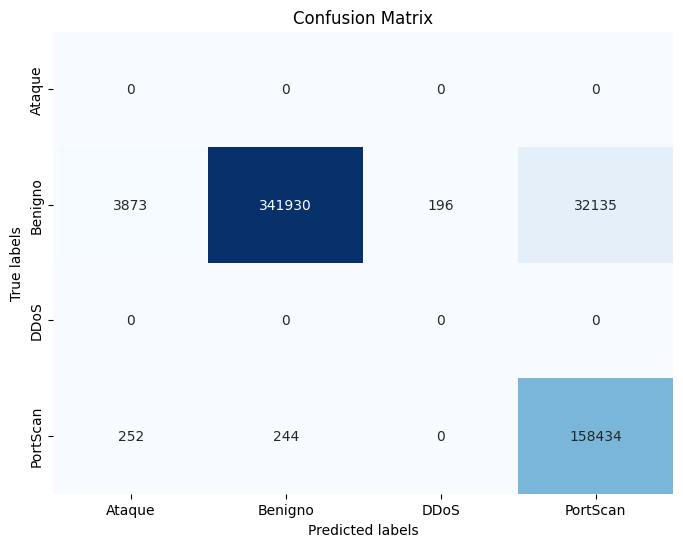

In [35]:
clf = load('good_train.joblib')

path="C:/Users/santi/Documents/TFG_Info/DataSheet/attacks/"
file = ["PortScan.csv"]

features=["Bwd Packet Length Max","Bwd Packet Length Mean","Bwd Packet Length Std","Flow Bytes/s",
"Flow Duration","Flow IAT Max","Flow IAT Mean","Flow IAT Min","Flow IAT Std","Fwd IAT Total","Fwd Packet Length Max",
"Fwd Packet Length Mean","Fwd Packet Length Min","Fwd Packet Length Std","Total Backward Packets","Total Fwd Packets",
"Total Length of Bwd Packets","Total Length of Fwd Packets","Label"]

#------------------------------------

for j in file: #this loop runs on the list containing the filenames.Operations are repeated for all attack files

    feature_list1=list(features)
    df1=pd.read_csv(path+j,usecols=feature_list1)#read an attack file.
    df1=df1.fillna(0)
    attack_or_not1=[]
    for i in df1["Label"]: #it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        
        if i =="BENIGN":
            attack_or_not1.append(0)
        elif i == "DDoS":
            attack_or_not1.append(1)
        elif i == "PortScan":
            attack_or_not1.append(2)
        else:
            attack_or_not1.append(-1) 

    df1["Label"]=attack_or_not1
    
    y_test_ps = df1["Label"] 
    del df1["Label"]
    feature_list1.remove('Label')
    X_test_ps = df1[feature_list1]
    predict_ps = clf.predict(X_test_ps)
#------------------------------------

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test_ps, predict_ps)

# Crea una figura y un eje
plt.figure(figsize=(8, 6))

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)

# Añade etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Añade las etiquetas de las clases
classes = ['Ataque', 'Benigno', 'DDoS', 'PortScan']
tick_marks = [0.5, 1.5, 2.5, 3.5]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Muestra la matriz de confusión
plt.show()


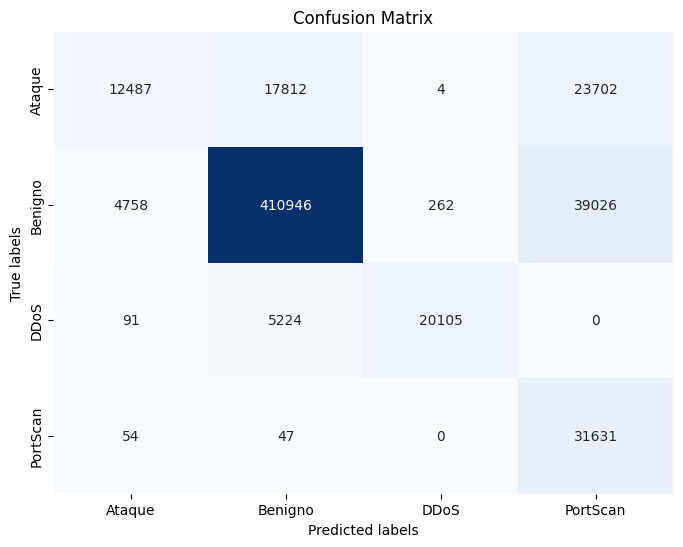

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, predict)

# Crea una figura y un eje
plt.figure(figsize=(8, 6))

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)

# Añade etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Añade las etiquetas de las clases
classes = ['Ataque', 'Benigno', 'DDoS', 'PortScan']
tick_marks = [0.5, 1.5, 2.5, 3.5]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Muestra la matriz de confusión
plt.show()

Vamos a analizar la matriz de confusión de cara a ver si me ha detectado correctamente los ataques buscados.

**Benigno**: Observamos que de los paquetes benignos tiene de verdaderos positivos un 95% de acierto. Por lo que si un paquete es bueno lo vamos a saber con bastante precisión. Como mucho podemos decir que a veces se confunde con DDoS pero la diferencia es bastante salvable.

**DDoS**: En este caso los DDoS tiene de verdaderos postivos un 98'99% de acierto. Por lo que si un paquete corresponde a un ataque de tipo DDoS tenemos bastante claro que se nos está atacando de esta manera.

**PortScan**: En este caso los PortScan tiene de verdaderos positivos un 98'41% de acierto. Así que del mismo modo que el anterior lo clasificamos correctamente.

**Otros Ataques**: Vemos que esta clase tiene un grado de confusión muy elevado ya que detecta los ataques como PortScan en su mayoría o sino como benignos. No resulta un gran problema porque esta clase lo que no permite es tener los ataques que no queremos clasificar apartados. De todos modos al tener tantos ataques con diferentes características en la misma clase, tiene sentido que no sean clasificados de manera correcta.

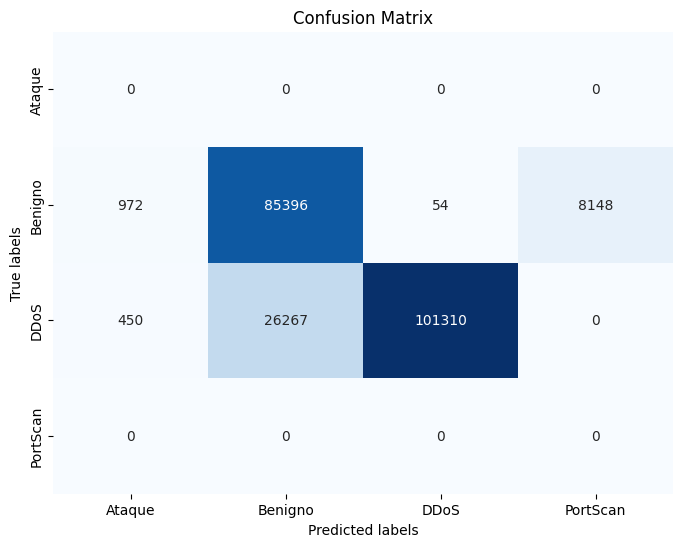

In [5]:
clf = load('good_train.joblib')

path="C:/Users/santi/Documents/TFG_Info/DataSheet/attacks/"
file = ["DDoS.csv"]

features=["Bwd Packet Length Max","Bwd Packet Length Mean","Bwd Packet Length Std","Flow Bytes/s",
"Flow Duration","Flow IAT Max","Flow IAT Mean","Flow IAT Min","Flow IAT Std","Fwd IAT Total","Fwd Packet Length Max",
"Fwd Packet Length Mean","Fwd Packet Length Min","Fwd Packet Length Std","Total Backward Packets","Total Fwd Packets",
"Total Length of Bwd Packets","Total Length of Fwd Packets","Label"]

#------------------------------------

for j in file: #this loop runs on the list containing the filenames.Operations are repeated for all attack files

    feature_list1=list(features)
    df1=pd.read_csv(path+j,usecols=feature_list1)#read an attack file.
    df1=df1.fillna(0)
    attack_or_not1=[]
    for i in df1["Label"]: #it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        
        if i =="BENIGN":
            attack_or_not1.append(0)
        elif i == "DDoS":
            attack_or_not1.append(1)
        elif i == "PortScan":
            attack_or_not1.append(2)
        else:
            attack_or_not1.append(-1) 

    df1["Label"]=attack_or_not1
    
    y_test_ps = df1["Label"] 
    del df1["Label"]
    feature_list1.remove('Label')
    X_test_ps = df1[feature_list1]
    predict_ps = clf.predict(X_test_ps)
#------------------------------------

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test_ps, predict_ps)

# Crea una figura y un eje
plt.figure(figsize=(8, 6))

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)

# Añade etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Añade las etiquetas de las clases
classes = ['Ataque', 'Benigno', 'DDoS', 'PortScan']
tick_marks = [0.5, 1.5, 2.5, 3.5]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Muestra la matriz de confusión
plt.show()